In [21]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, metrics, svm,decomposition

In [22]:
lfw_data = datasets.fetch_lfw_people(min_faces_per_person = 100, resize=0.4)
lfw_data.keys()

dict_keys(['target', 'target_names', 'images', 'DESCR', 'data'])

In [23]:
lfw_data.data.shape

(1140, 1850)

In [24]:
lfw_data.target_names
np.unique(lfw_data.target, return_counts = True)

(array([0, 1, 2, 3, 4], dtype=int64),
 array([236, 121, 530, 109, 144], dtype=int64))

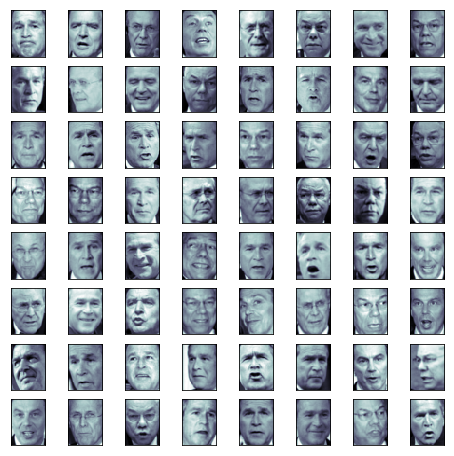

In [25]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_data.images[i], cmap = plt.cm.bone)
plt.show()

In [26]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(lfw_data.data, lfw_data.target) 

In [27]:
pca = decomposition.PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
k = 0
total = 0
while total < 0.99:
    total = total + pca.explained_variance_ratio_[k]
    k = k + 1
k

319

In [29]:
pca = decomposition.PCA(n_components=131)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [30]:
x_train_pca.shape, x_test_pca.shape

((855, 131), (285, 131))

In [31]:
svc = svm.SVC(kernel = 'linear')
svc.fit(x_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
y_test_pred = svc.predict(x_test_pca)
metrics.confusion_matrix(y_test, y_test_pred)

array([[ 46,   2,   4,   0,   1],
       [  0,  23,   5,   2,   0],
       [  2,   6, 121,   3,   2],
       [  0,   1,   6,  20,   3],
       [  2,   1,   4,   5,  26]])

In [33]:
print(metrics.classification_report(y_test_pred,y_test))

             precision    recall  f1-score   support

          0       0.87      0.92      0.89        50
          1       0.77      0.70      0.73        33
          2       0.90      0.86      0.88       140
          3       0.67      0.67      0.67        30
          4       0.68      0.81      0.74        32

avg / total       0.83      0.83      0.83       285

